In [21]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import pandas as pd

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#step 2 is reading the data frame

In [24]:
dataframe=pd.read_csv("Zomato_data.csv")

In [25]:
print(dataframe)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [33]:
dataframe
#data cleaning and correcting

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [28]:
def handlerate(Value):
    Value=str(Value).split('/')   #if i want to split it it has to be a string value.we cant split it a integer or a string
    Value=Value[0];
    return float(Value)

dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [18]:
##type of resturant

In [30]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

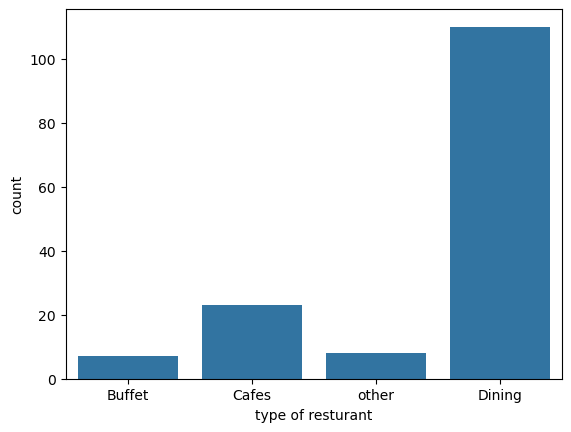

In [31]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

In [32]:
#1st problem statement ans is majority of the people orders from dining

Text(0, 0.5, 'Total votes')

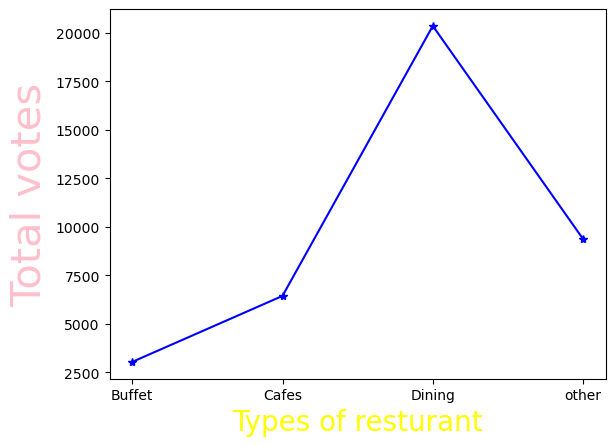

In [38]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="blue",marker="*")
plt.xlabel("Types of resturant",c="yellow",size=20)
plt.ylabel("Total votes",c="pink",size=30)


In [39]:
#WHAT IS THE RATING MAJORITY OF THE RESTURANT RECEIVIES

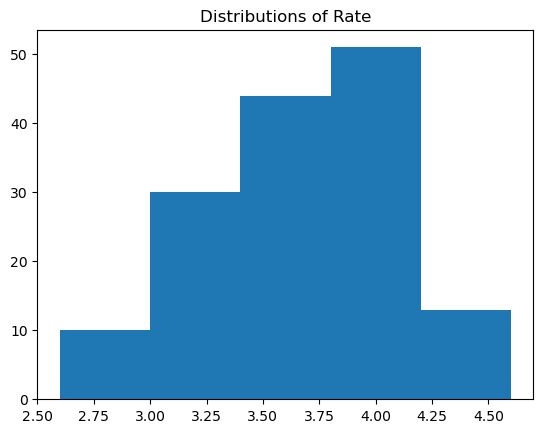

In [40]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Distributions of Rate")
plt.show()

In [41]:
#what is the spending of couples in each order

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

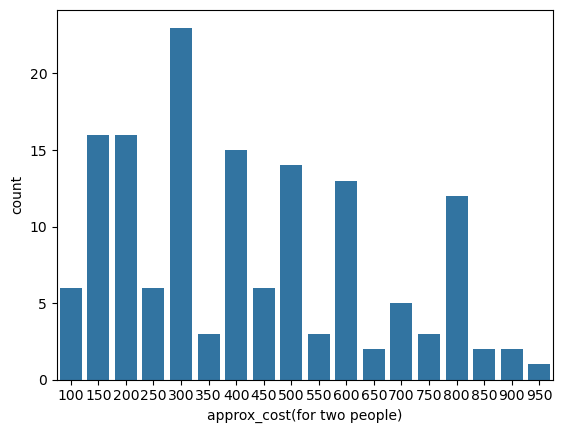

In [43]:
couple_spend=dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_spend)

In [45]:
#which  mode has highest rating for a particular resturant


<Axes: xlabel='online_order', ylabel='rate'>

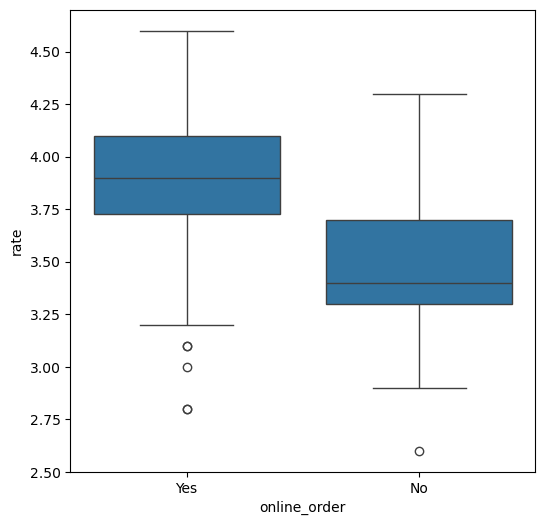

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

In [50]:
#which types of resturant reicieves more order 
#so zomato can give them more offers and do more marketing 

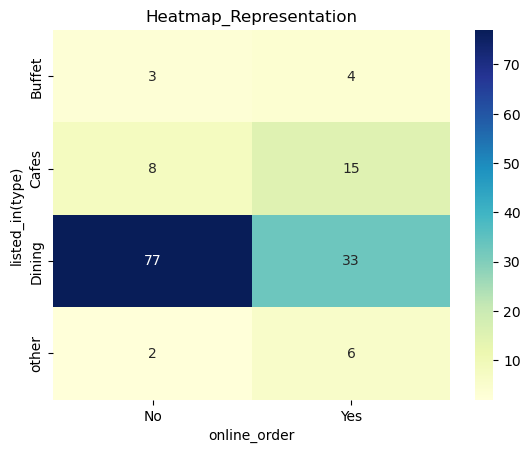

In [54]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap_Representation')
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()